In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download("stopwords")



Using TensorFlow backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joaki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
plt.rcParams['figure.figsize'] = (16,8)

# Heading 1
# Heading 2
## Heading 2.1
## Heading 2.2
1. Numbered item
1. Numbered item

In [5]:
df = pd.read_csv("./winemag-data_first150k.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [6]:
print(df.describe())

          Unnamed: 0         points          price
count  150930.000000  150930.000000  137235.000000
mean    75464.500000      87.888418      33.131482
std     43569.882402       3.222392      36.322536
min         0.000000      80.000000       4.000000
25%     37732.250000      86.000000      16.000000
50%     75464.500000      88.000000      24.000000
75%    113196.750000      90.000000      40.000000
max    150929.000000     100.000000    2300.000000


In [7]:
print(df.shape)
df = df.drop(columns=["Unnamed: 0", "region_1", "region_2"])
df = df.dropna()
df = df.drop_duplicates(subset="description")
df.head()
print(df.shape)

(150930, 11)
(61484, 8)


In [8]:
df.describe()

,points,price
count,61484.000000,61484.000000
mean,88.215519,36.166352
std,3.229942,36.391130
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,27.000000
75%,90.000000,45.000000
max,100.000000,2013.000000


In [9]:
df.head()

,country,description,designation,points,price,province,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Provence red blend,Domaine de la Bégude


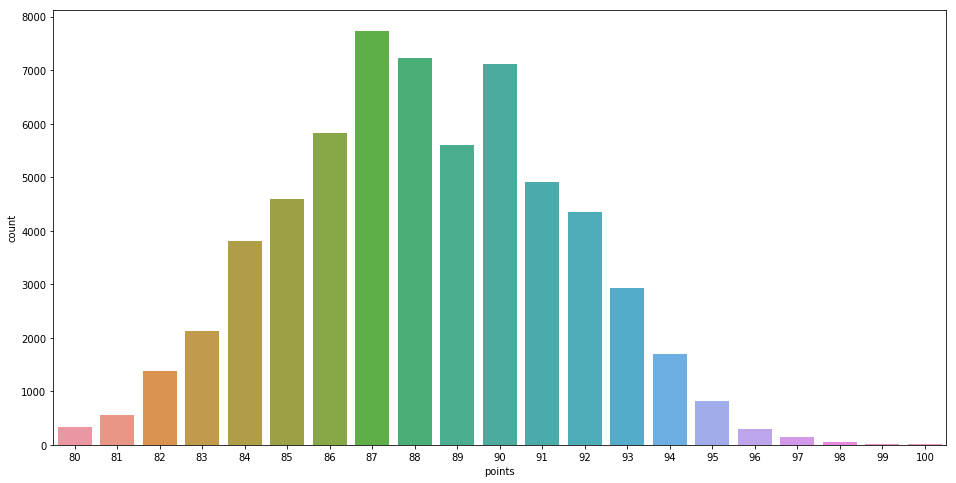

In [10]:
sns.countplot(x="points", data=df)

[(0, 250)]

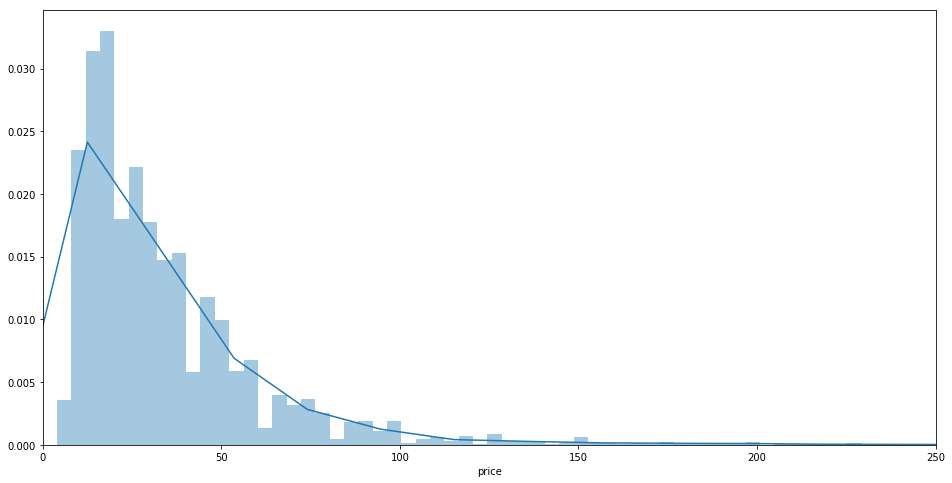

In [11]:
sns.distplot(df.price, bins=500).set(xlim=(0, 250))


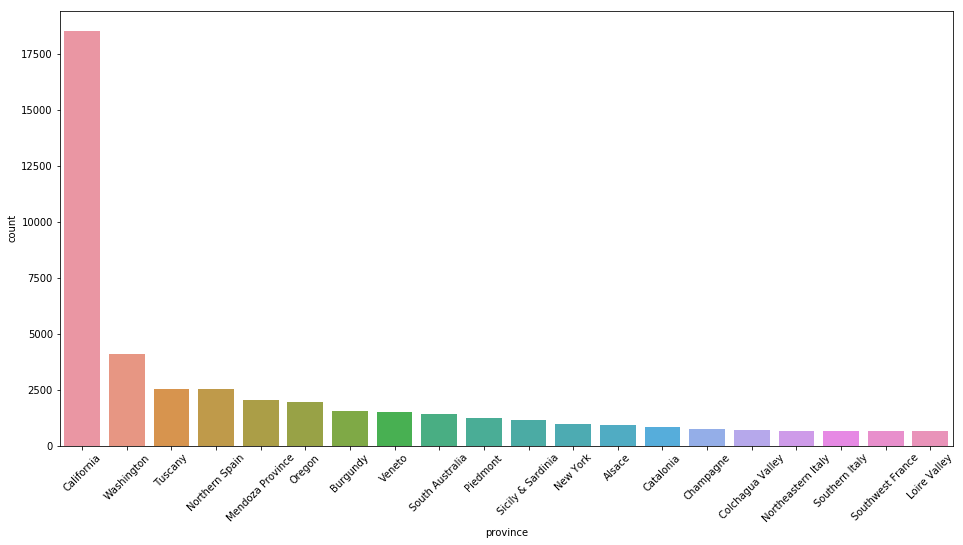

In [12]:
g = sns.countplot(x="province", data=df,  order = df['province'].value_counts().iloc[:20].index)
plt.setp(g.get_xticklabels(), rotation=45)
plt.show()

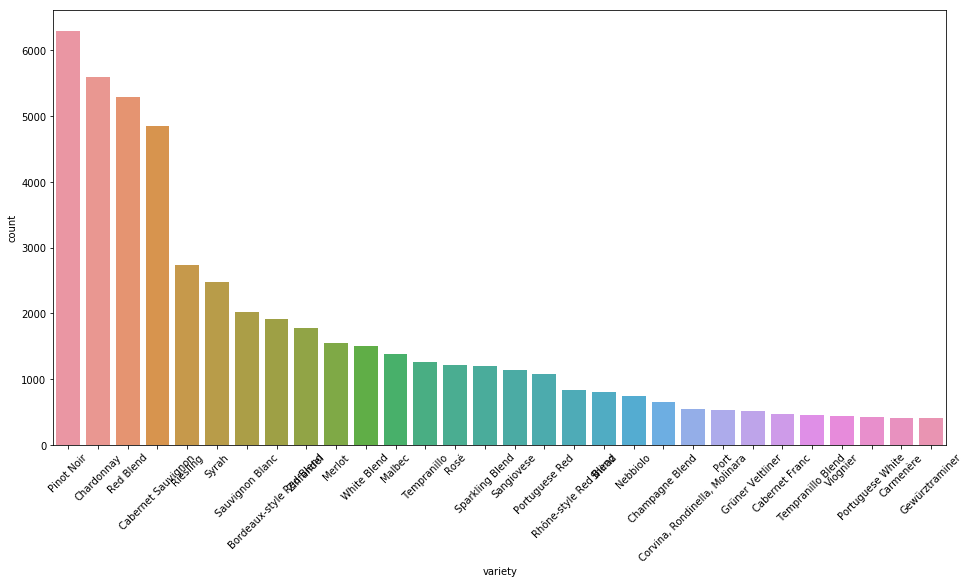

In [13]:
g = sns.countplot(x="variety", data=df,  order = df['variety'].value_counts().iloc[:30].index)
plt.setp(g.get_xticklabels(), rotation=45)
plt.show()

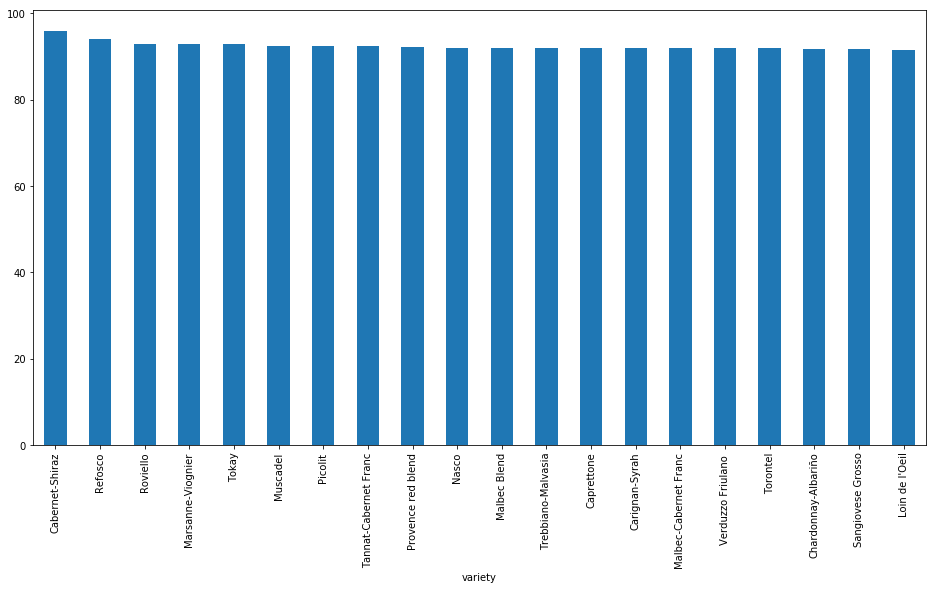

In [14]:
df.groupby('variety').mean().sort_values(by='points', ascending=False)['points'].iloc[:20].plot(kind='bar')

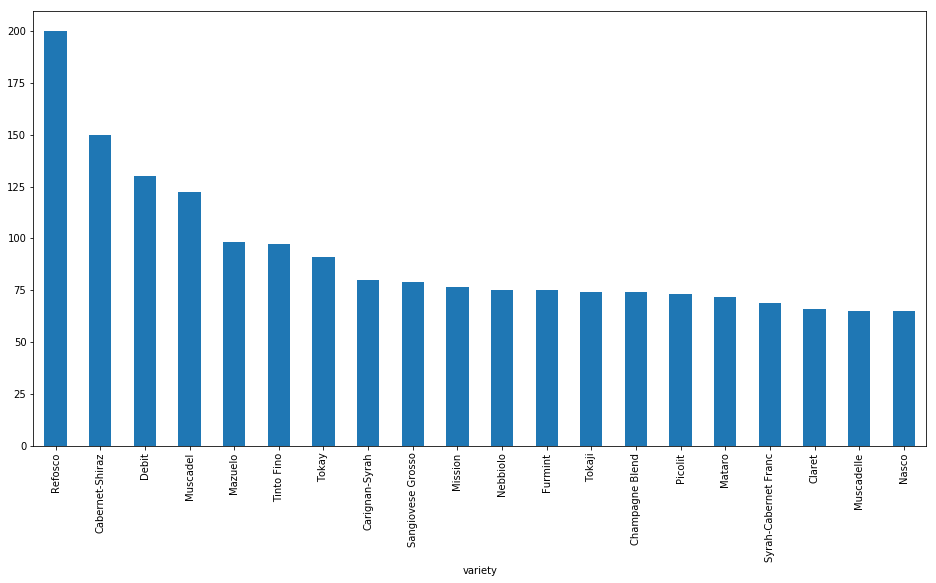

In [15]:
df.groupby('variety').mean().sort_values(by='price', ascending=False)['price'].iloc[:20].plot(kind='bar')

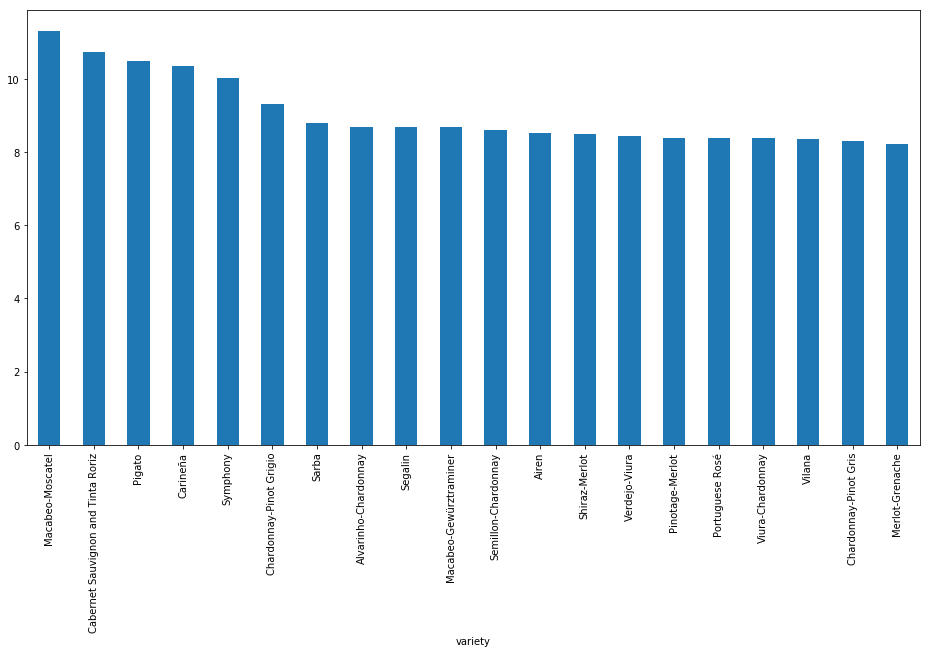

In [16]:
test = df.groupby('variety').mean()

test["P/P"] = test.points / test.price
test.head()
test.sort_values(by='P/P', ascending=False)['P/P'].iloc[:20].plot(kind='bar')

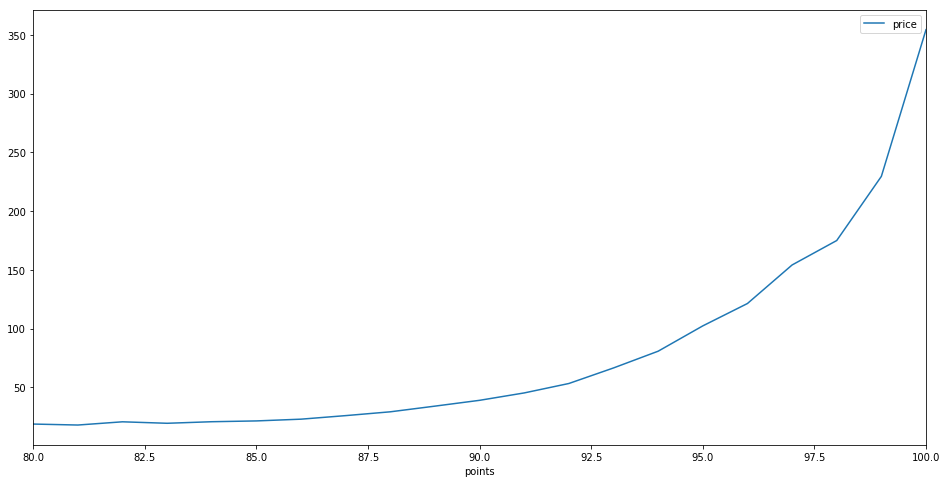

In [17]:
df.groupby('points').mean().plot()

In [18]:
print(df.groupby('country').mean().drop(columns=["price"]).sort_values(by="points", ascending=False))
print(df.groupby('country').mean().drop(columns=["points"]).sort_values(by="price", ascending=False))

                           points
country                          
England                 92.750000
Austria                 89.551648
Germany                 88.976310
France                  88.884307
Canada                  88.814159
Italy                   88.670780
Turkey                  88.612903
Australia               88.450544
US                      88.412223
Portugal                88.328266
Slovenia                88.243902
New Zealand             88.089552
Hungary                 88.073394
Serbia                  88.000000
South Africa            87.704516
India                   87.666667
Morocco                 87.600000
Israel                  87.443366
Luxembourg              87.000000
Spain                   86.933694
Cyprus                  86.750000
Croatia                 86.577778
Argentina               86.571725
Chile                   86.498077
Switzerland             86.333333
Greece                  86.176316
Bulgaria                86.121951
Lebanon       

In [19]:
temp = df.groupby('country').mean()
temp["bestPrice"] = temp["points"] / temp["price"]

print(temp.dropna().sort_values(by="bestPrice", ascending=False))

                           points      price  bestPrice
country                                                
China                   82.000000   7.000000  11.714286
Lithuania               84.250000  10.000000   8.425000
Bulgaria                86.121951  12.487805   6.896484
Bosnia and Herzegovina  85.000000  13.000000   6.538462
Ukraine                 84.600000  13.000000   6.507692
South Korea             81.500000  13.500000   6.037037
India                   87.666667  15.000000   5.844444
Cyprus                  86.750000  16.166667   5.365979
Romania                 85.569892  17.021505   5.027164
Moldova                 85.358974  17.358974   4.917282
Macedonia               84.750000  17.250000   4.913043
Georgia                 85.592593  18.962963   4.513672
Chile                   86.498077  20.636218   4.191566
Morocco                 87.600000  22.800000   3.842105
Greece                  86.176316  22.823684   3.775741
Brazil                  83.909091  22.909091   3

In [20]:
temp = df[df.points > 90]
temp["bestPrice"] = temp["points"] / temp["price"]

print(temp.dropna().sort_values(by="price", ascending=True))

          country                                        description  \
19989          US  Pungent aromas of concentrated stone fruits, b...   
110140         US  With full ripeness, density and concentration,...   
53469          US  This tangy, all-stainless, lightly grassy, dry...   
69461       Spain  Top-notch manzanilla, plain and simple. What's...   
2547     Portugal  This is a fine wine, with great structure and ...   
24580    Portugal  A very soft-textured wine with delicious jammy...   
40946    Portugal  A firm wine, based on dry tannins and some den...   
9263      Germany  Blue Fish Riesling consistently stuns in a bli...   
115648  Argentina  Sensational wine for the money. The Cab and Me...   
100496   Portugal  From Reguengos de Monsaraz in southern Alentej...   
76968    Portugal  Full and rounded wine, with touches of toast, ...   
24451    Portugal  With an initial smooth texture, this is a rich...   
131604  Argentina  One of the year's best red wine values has to

C:\Users\joaki\.conda\envs\3.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:

df = pd.read_csv("./winemag-data_first150k.csv")
print(df.shape)
df = df[["description","variety"]]
df = df.dropna()
df = df.drop_duplicates(subset="description")
print(df.shape)
df.head()

(150930, 11)
(97821, 2)


,description,variety
0,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
2,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
3,"This spent 20 months in 30% new French oak, an...",Pinot Noir
4,"This is the top wine from La Bégude, named aft...",Provence red blend


In [31]:
import gc
gc.collect()

5046

In [32]:
# Clean
df.description = df.description.str.replace('[^A-Za-z\s]+', '')
df.description = df.description.str.lower()

In [33]:
ps = PorterStemmer()
english_words = stopwords.words('english')

def stem_sentences(sentence):
    sentence = sentence.split()
    sentence = [word for word in sentence if not word in english_words]
    sentence = [ps.stem(word) for word in sentence]
    return ' '.join(sentence)

print(df['description'].head())
df['description'] = df['description'].apply(stem_sentences)
print(df['description'].head())

0    this tremendous  varietal wine hails from oakv...
1    ripe aromas of fig blackberry and cassis are s...
2    mac watson honors the memory of a wine once ma...
3    this spent  months in  new french oak and inco...
4    this is the top wine from la bgude named after...
Name: description, dtype: object
0    tremend variet wine hail oakvil age three year...
1    ripe aroma fig blackberri cassi soften sweeten...
2    mac watson honor memori wine made mother treme...
3    spent month new french oak incorpor fruit ponz...
4    top wine la bgude name highest point vineyard ...
Name: description, dtype: object


In [34]:
vocab_size = 10000
tokenize = Tokenizer(num_words=vocab_size)

tokenize.fit_on_texts(df.description)
print(len(tokenize.word_index) + 1)

X = tokenize.texts_to_matrix(df.description, mode='tfidf')

33069


In [35]:
encoder = LabelBinarizer()
encoder.fit(df.variety)
Y = encoder.transform(df.variety)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(y_train.shape[1])

632


In [39]:

input_dim = x_train.shape[1]  # Number of features
output_dim = y_train.shape[1]  # Number of features
# print(y_test.head())
model = Sequential()

model.add(Dense(128, input_dim=input_dim))
model.add(Activation('tanh'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(output_dim))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='adam')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model_output = model.fit(x_train, y_train,
             batch_size=32,
             epochs=100,
             verbose=2,
             callbacks=[es],
             validation_split=0.2)


Train on 54779 samples, validate on 13695 samples
Epoch 1/100
 - 27s - loss: 2.3354 - acc: 0.4814 - val_loss: 1.7834 - val_acc: 0.5796
Epoch 2/100
 - 24s - loss: 1.4761 - acc: 0.6487 - val_loss: 1.7094 - val_acc: 0.5919
Epoch 3/100
 - 26s - loss: 1.1159 - acc: 0.7242 - val_loss: 1.7554 - val_acc: 0.5928
Epoch 4/100
 - 23s - loss: 0.8722 - acc: 0.7786 - val_loss: 1.8550 - val_acc: 0.5907
Epoch 5/100
 - 19s - loss: 0.6929 - acc: 0.8185 - val_loss: 1.9657 - val_acc: 0.5851
Epoch 6/100
 - 18s - loss: 0.5467 - acc: 0.8532 - val_loss: 2.1225 - val_acc: 0.5803
Epoch 7/100
 - 23s - loss: 0.4388 - acc: 0.8778 - val_loss: 2.2553 - val_acc: 0.5760
Epoch 00007: early stopping


Training Accuracy :  0.7403254114606862
Validation Accuracy :  0.5851979345669241


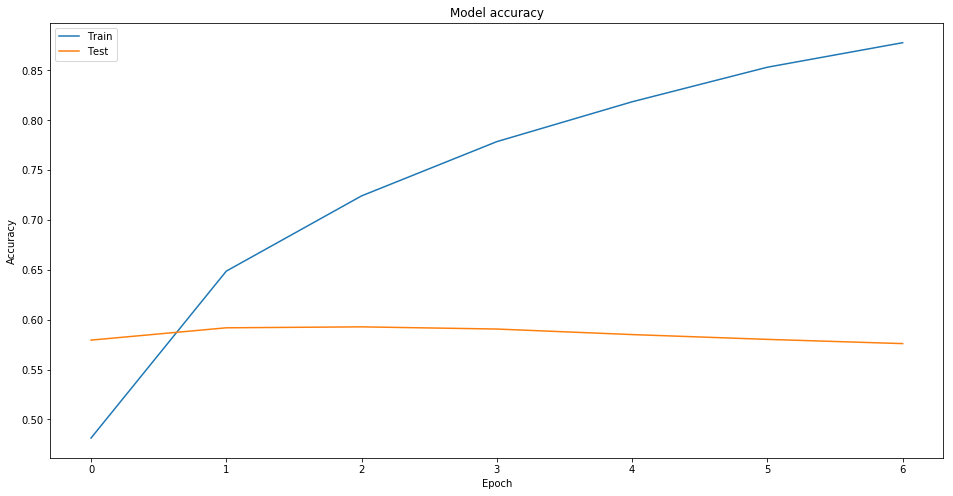

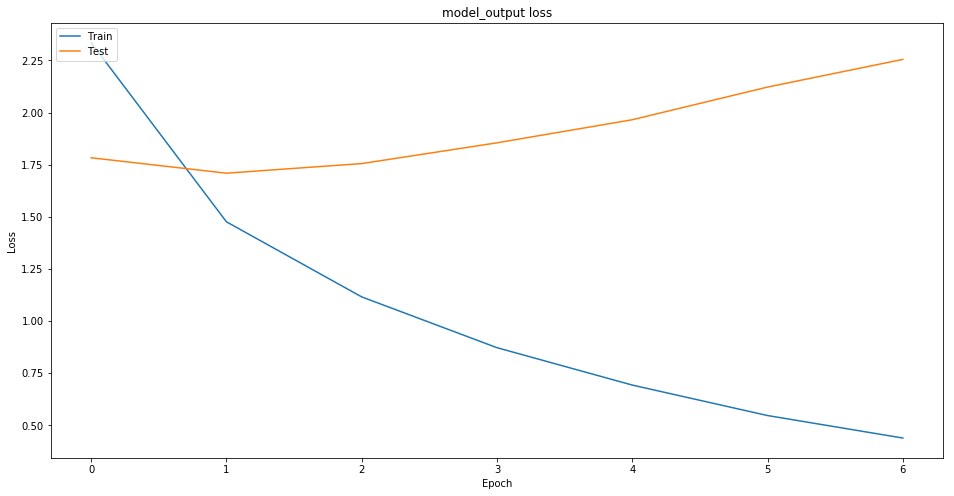

In [40]:
print('Training Accuracy : ' , np.mean(model_output.history["acc"]))
print('Validation Accuracy : ' , np.mean(model_output.history["val_acc"]))

plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()